# Testing Deep Q-Learning Agent

In [1]:
import gymnasium as gym
import torch
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from IPython.display import display, clear_output

from dqn import QAgent

In [2]:
def show_video(agent,
               env,
               sleep_sec: float = 0.01,
               mode: str = "rgb_array"):
    state_size = env.observation_space.shape[0]
    state, _ = env.reset()

    if mode == "rgb_array":
        steps = 0
        fig, ax = plt.subplots(figsize=(8, 6))

    done = False
    while not done:
        state = np.reshape(state, [1, state_size])
        action = agent.act(state)
        state, _, done, _, _ = env.step(action)

        if mode == "rgb_array":
            steps += 1
            frame = env.render()
            ax.cla()
            ax.axes.yaxis.set_visible(False)
            ax.imshow(frame)
            ax.set_title(f'Steps: {steps}')
            display(fig)
            clear_output(wait=True)
            plt.pause(sleep_sec)
        else:
            env.render()
            sleep(sleep_sec)

In [3]:
# define environment
env = gym.make('LunarLander-v2', render_mode='rgb_array')

# define parameters
episodes = 10

# define agent
agent = QAgent(env)

In [4]:
# load state_dict and play in environment
agent.model.load_state_dict(torch.load('Trained_Agents/DQN_Agent.pth'))
agent.model.eval()
agent.testing(env=env, episodes=episodes)

Episode 1	Score: 257.02 	Timesteps: 511 	Time: 00:00:01
Episode 2	Score: 215.61 	Timesteps: 449 	Time: 00:00:01
Episode 3	Score: 250.11 	Timesteps: 291 	Time: 00:00:00
Episode 4	Score: 268.60 	Timesteps: 397 	Time: 00:00:01
Episode 5	Score: -41.94 	Timesteps: 226 	Time: 00:00:00
Episode 6	Score: 283.96 	Timesteps: 373 	Time: 00:00:01
Episode 7	Score: -40.25 	Timesteps: 225 	Time: 00:00:00
Episode 8	Score: 284.13 	Timesteps: 264 	Time: 00:00:00
Episode 9	Score: 241.47 	Timesteps: 437 	Time: 00:00:01
Episode 10	Score: 138.40 	Timesteps: 825 	Time: 00:00:02


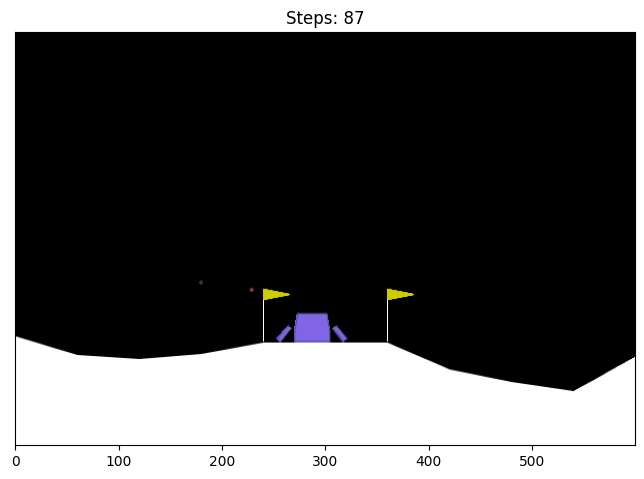

In [10]:
# the goal is to reach an average score on training of at least 200 so that each run is a win
show_video(agent, env, sleep_sec=1e-5)
env.close()